In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Loading the dataset 
data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

Understanding the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         191407 non-null  object 
 1   County                                             191403 non-null  object 
 2   City                                               191403 non-null  object 
 3   State                                              191407 non-null  object 
 4   Postal Code                                        191403 non-null  float64
 5   Model Year                                         191407 non-null  int64  
 6   Make                                               191407 non-null  object 
 7   Model                                              191407 non-null  object 
 8   Electric Vehicle Type                              191407 non-null  object

In [5]:
data.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


DATA CLEANING

In [6]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 414
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [7]:
#drop all null values
data.dropna(inplace=True)


EXPLORATORY DATA ANALYSIS

In [8]:
#perform EDA analysis on the data
data.describe()


,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,190989.000000,190989.000000,190989.000000,190989.000000,190989.000000,1.909890e+05,1.909890e+05
mean,98262.698742,2020.733529,55.630335,993.899832,29.017090,2.237421e+08,5.303985e+10
std,305.327672,2.990753,90.128825,8047.355590,14.909503,7.398037e+07,1.626802e+07
min,98001.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,5.300195e+10
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.861861e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,2.328409e+08,5.303303e+10
75%,98372.000000,2023.000000,72.000000,0.000000,42.000000,2.589745e+08,5.305307e+10
max,99403.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10


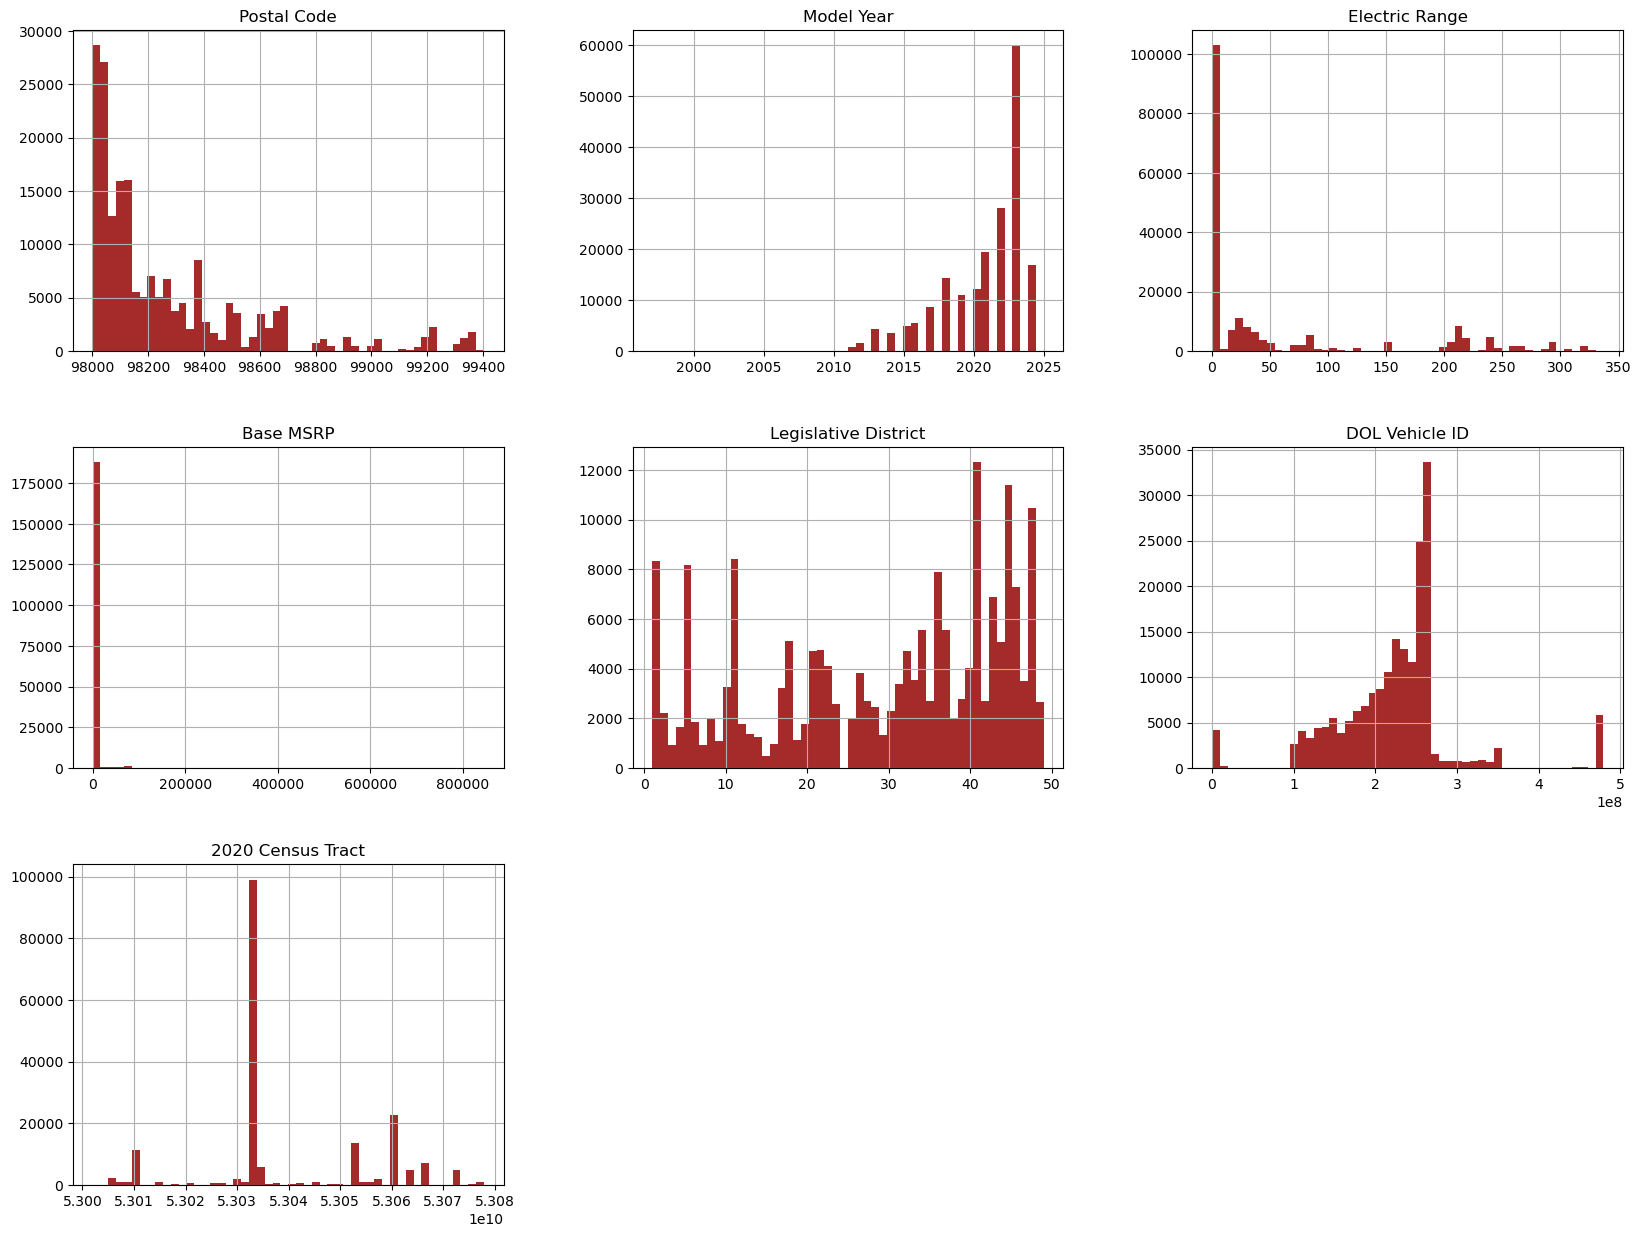

In [9]:
#what is the distribution of the data
data.hist(bins=50, figsize=(20,15), color= 'brown')
plt.show()

MODELING

In [10]:
#select features for the model
features = ['Model Year', 'Make', 'Electric Vehicle Type']
target = 'Electric Range'

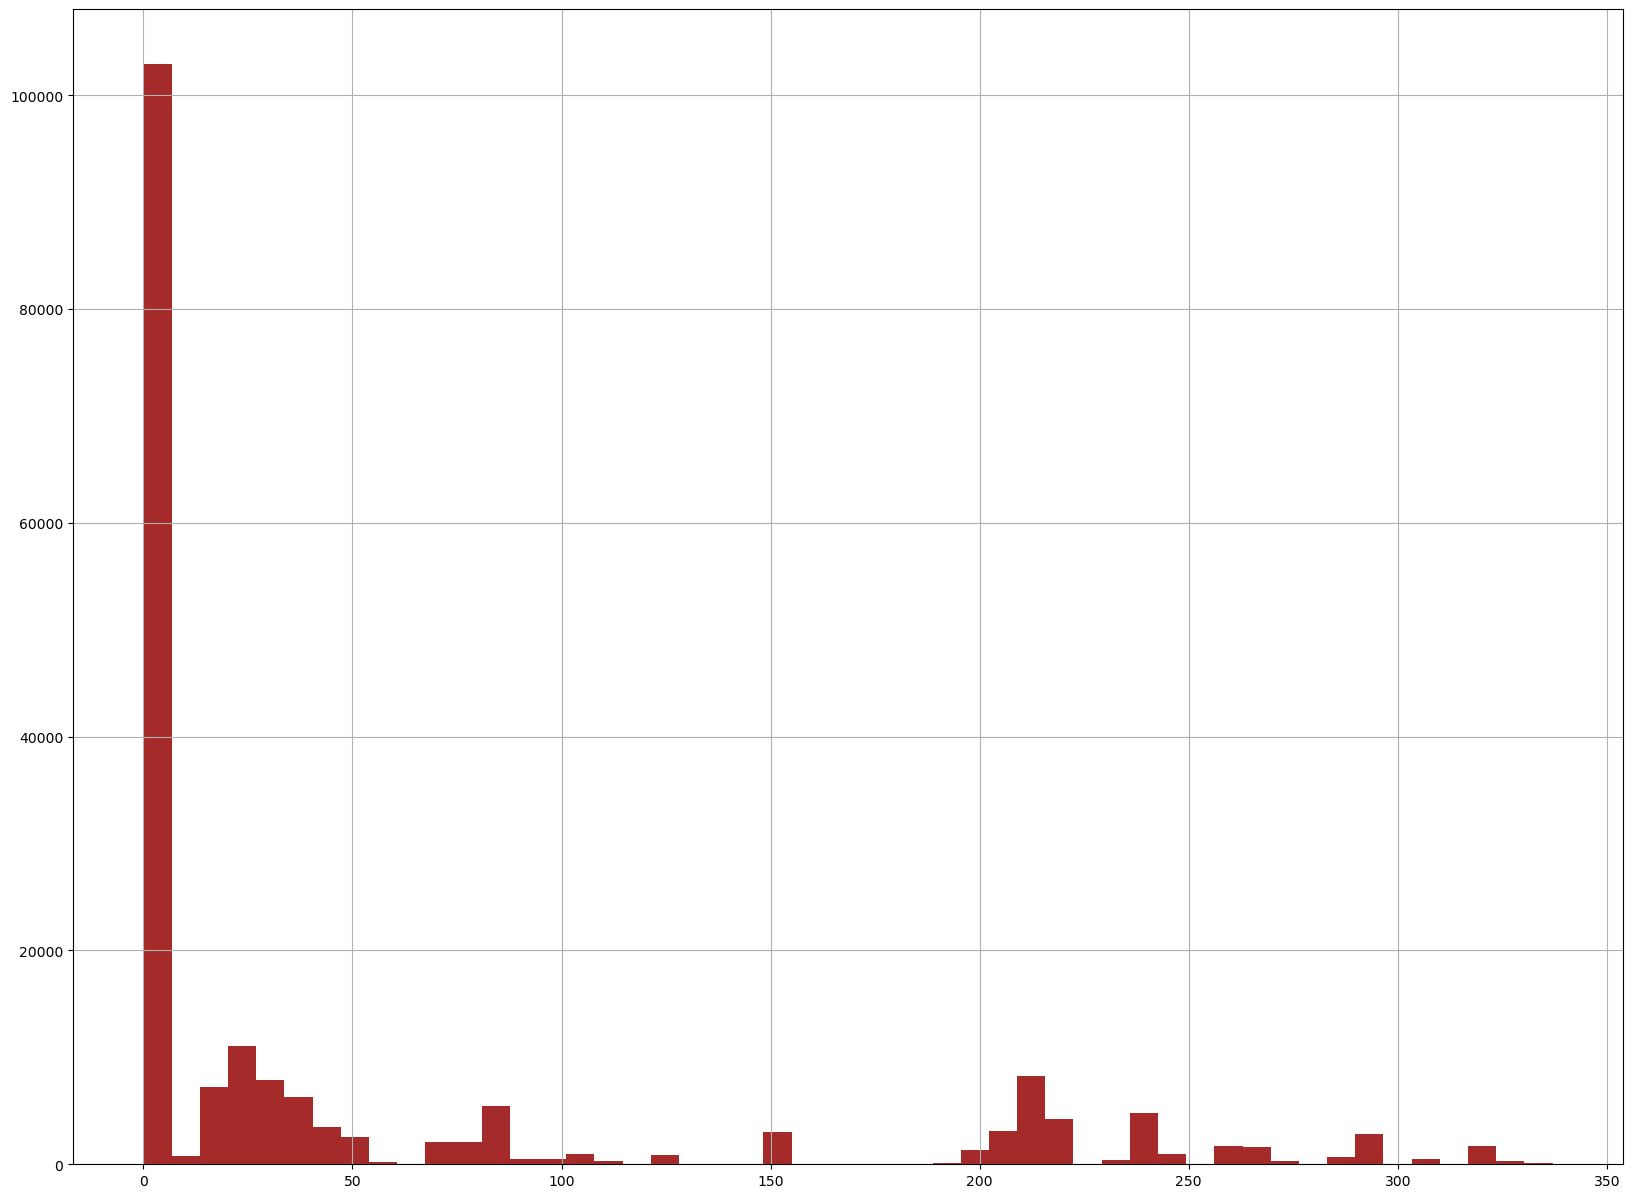

In [11]:
#Plotting the distribution of the Electric Range column
data['Electric Range'].hist(bins=50, figsize=(20,15), color= 'brown')
plt.show()



The histogram shows that the Electric Range has a highly skewed distribution with a large number of vehicles having an electric range close to zero. This can significantly impact the regression analysis.

Transforming the Electric Range to reduce skewness.

In [12]:
#Transform the  Electric range
data['Log Electric Range'] = np.log1p(data['Electric Range'])


In [13]:
# Encode categorical variables
from sklearn.preprocessing import OneHotEncoder

features = ['Model Year', 'Make', 'Electric Vehicle Type', 'Base MSRP', 'Legislative District']
target = 'Log Electric Range'

encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(data[features])
y = data[target]


/Users/hocketapersil/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encoded_features, y, test_size=0.2, random_state=42)

LINEAR REGRESSION

In [15]:
#train the model using Linear Reg
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
#Model Prediction

from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.9199546294869371
R^2 Score: 0.8216736420859329


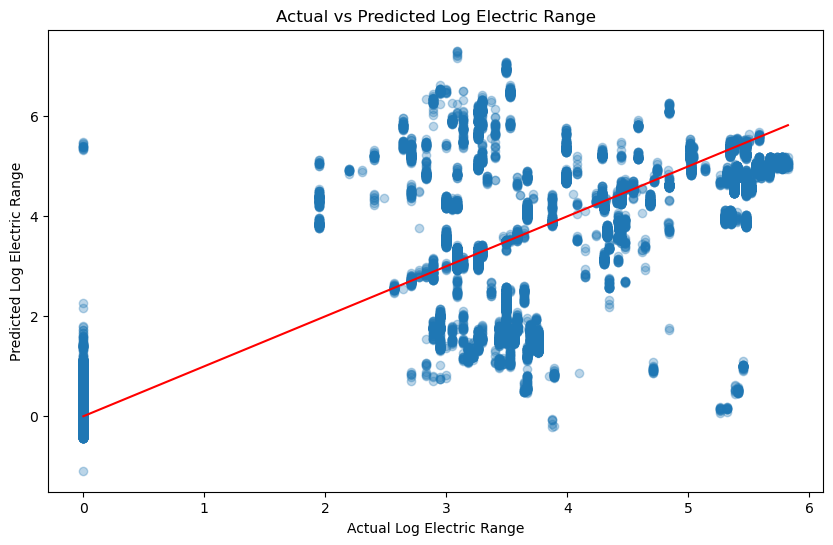

In [17]:
#Plot Actual vs. Predicted Values
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect prediction line
plt.xlabel('Actual Log Electric Range')
plt.ylabel('Predicted Log Electric Range')
plt.title('Actual vs Predicted Log Electric Range')
plt.show()


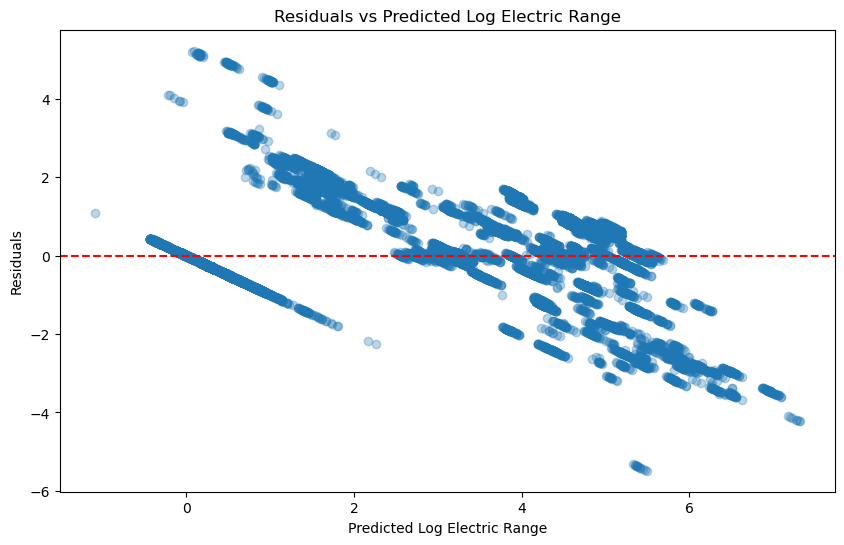

In [18]:
#Plot Residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Log Electric Range')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Log Electric Range')
plt.show()


DECISION TREE MODEL 

In [19]:
#train the model using DCT
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [20]:
#Make Predictions and Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.04064921892984052
R^2 Score: 0.9921204514532932


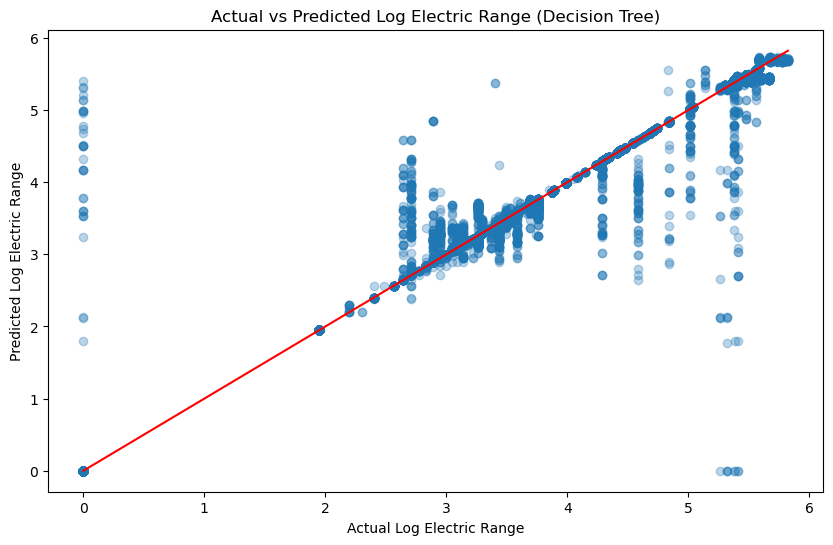

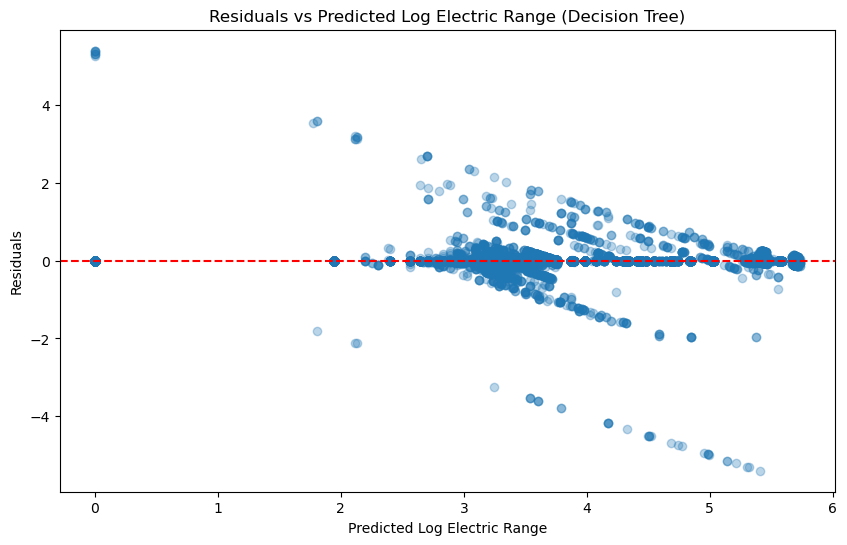

In [21]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect prediction line
plt.xlabel('Actual Log Electric Range')
plt.ylabel('Predicted Log Electric Range')
plt.title('Actual vs Predicted Log Electric Range (Decision Tree)')
plt.show()

# Plot Residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Log Electric Range')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Log Electric Range (Decision Tree)')
plt.show()


RANDOM FOREST

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
#Train the Random Forest Model
model = RandomForestRegressor(random_state=46, n_estimators=100)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=46)

In [24]:
#Make predictions
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.03759537919941116
R^2 Score: 0.992712415556006


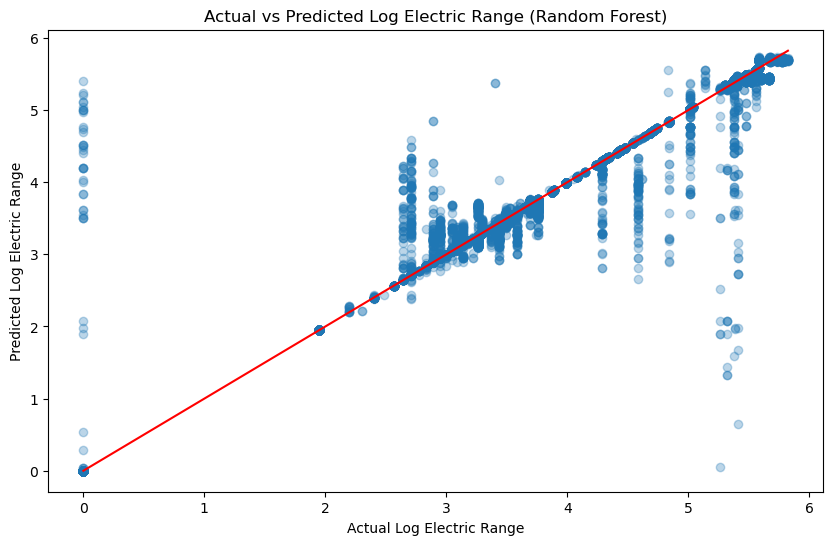

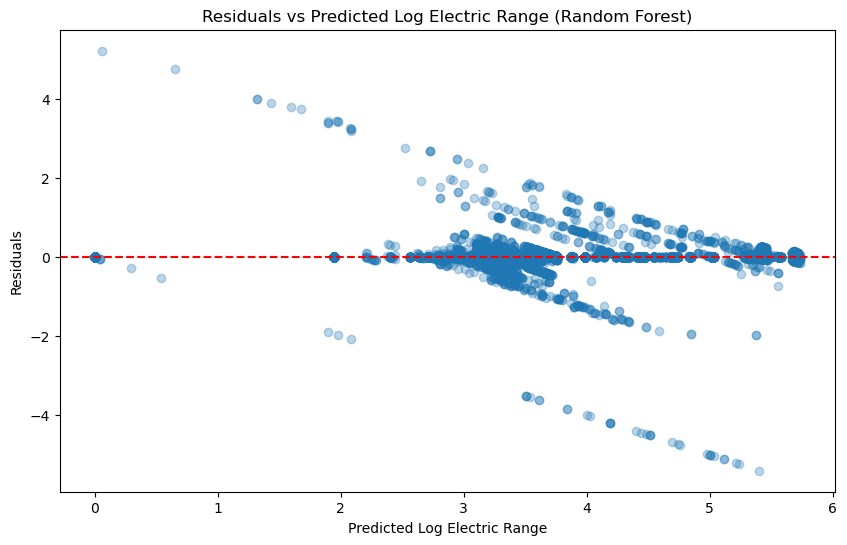

In [25]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect prediction line
plt.xlabel('Actual Log Electric Range')
plt.ylabel('Predicted Log Electric Range')
plt.title('Actual vs Predicted Log Electric Range (Random Forest)')
plt.show()

# Plot Residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Log Electric Range')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Log Electric Range (Random Forest)')
plt.show()
